<h1>MILESTONE-3</h1>

<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">

<h2 align="left"><font color=skyblue>Anomaly Detection</font></h2>


<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue>Data set</font></h2>


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Healthcare Providers.csv")
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue>Information about the dataset</font></h2>


In [3]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [4]:
irrelevant_columns=['Entity Type of the Provider',
                    'Street Address 1 of the Provider',
                    'Street Address 2 of the Provider',
                    'Zip Code of the Provider',
                    'Medicare Participation Indicator',
                    'Place of Service',
                    'HCPCS Code',
                    'HCPCS Description',
                    'HCPCS Drug Indicator',
                    'Country Code of the Provider']

In [5]:
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [6]:
numeric_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue>Missing values</font></h2>


In [13]:
# missing values
print(data.isnull().sum())

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
City of the Provider                                            0
State Code of the Provider                                      0
Provider Type                                                   0
Number of Services                                              0
Number of Medicare Beneficiaries                                0
Number of Distinct Medicare Beneficiary/Per Day Services        0
Average Medicare Allowed Amount                                 0
Average Submitted Charge Amount                                 0
Average Me

<div style="border-radius:10px; padding: 15px; font-size:80%; text-align:left">

<h2 align="left"><font color=skyblue>Check for duplicates</font></h2>


In [14]:
# Check for duplicates
print(data.duplicated().sum())
data.head()


0


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">

<h2 align="left"><font color=green>Isolation Forest</font></h2>


This code snippet demonstrates using the Isolation Forest algorithm to detect anomalies in a synthetic dataset. First, a dataset is generated with training, test, and outlier data, combining points clustered around specific centers and uniformly distributed outliers. The data is then standardized using StandardScaler to ensure equal feature contribution. The Isolation Forest model is trained on the standardized training data and subsequently used to predict anomalies in the training, test, and outlier data. Anomalies are labeled as -1, while normal points are labeled as 1. Finally, the results are visualized with a plot that displays the training data in white, test data in green, outliers in red, and detected anomalies marked with blue 'x's. This visualization helps illustrate how effectively the model identifies anomalies across different datasets.

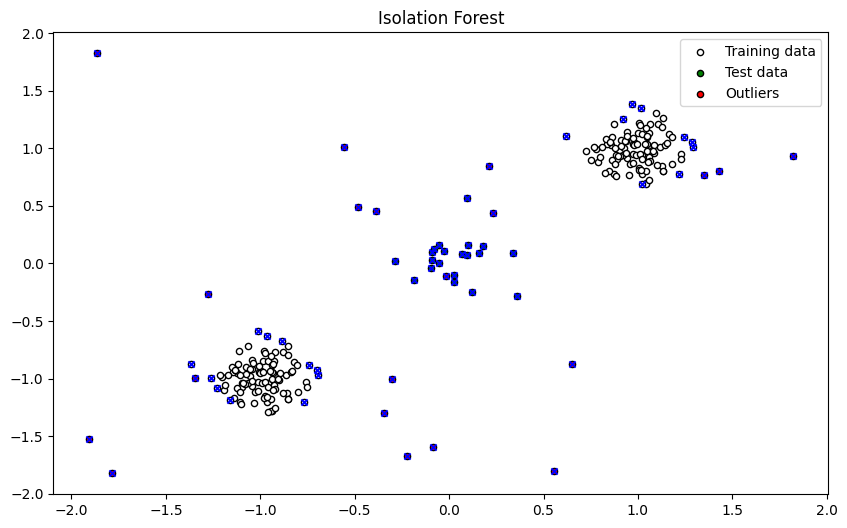

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Generating a synthetic dataset
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_test = 0.3 * rng.randn(20, 2)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_outliers = scaler.transform(X_outliers)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=rng)
iso_forest.fit(X_train)

# Predicting anomalies
y_pred_train_iso = iso_forest.predict(X_train)
y_pred_test_iso = iso_forest.predict(X_test)
y_pred_outliers_iso = iso_forest.predict(X_outliers)

# Plotting results
def plot_results(X_train, X_test, X_outliers, y_pred_train, y_pred_test, y_pred_outliers, title):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k', label="Training data")
    plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k', label="Test data")
    plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k', label="Outliers")
    plt.scatter(X_train[y_pred_train == -1][:, 0], X_train[y_pred_train == -1][:, 1], c='blue', s=20, edgecolor='k', marker='x')
    plt.scatter(X_test[y_pred_test == -1][:, 0], X_test[y_pred_test == -1][:, 1], c='blue', s=20, edgecolor='k', marker='x')
    plt.scatter(X_outliers[y_pred_outliers == -1][:, 0], X_outliers[y_pred_outliers == -1][:, 1], c='blue', s=20, edgecolor='k', marker='x')
    plt.legend()
    plt.show()

plot_results(X_train, X_test, X_outliers, y_pred_train_iso, y_pred_test_iso, y_pred_outliers_iso, "Isolation Forest")


<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">

<h2 align="left"><font color=green>Elliptic Envelope</font></h2>



This code demonstrates using the Elliptic Envelope algorithm to detect anomalies in a synthetic dataset. A dataset is generated with training, test, and outlier data, which is then standardized using StandardScaler to ensure consistent feature scaling. The Elliptic Envelope model is trained on the standardized training data and predicts anomalies in the training, test, and outlier datasets. Anomalies are labeled as -1, while normal points are labeled as 1. The results are visualized in a plot, where training data points are shown in white, test data in green, outliers in red, and detected anomalies marked with blue 'x's. This visualization illustrates the model's effectiveness in identifying anomalies across different data sets.

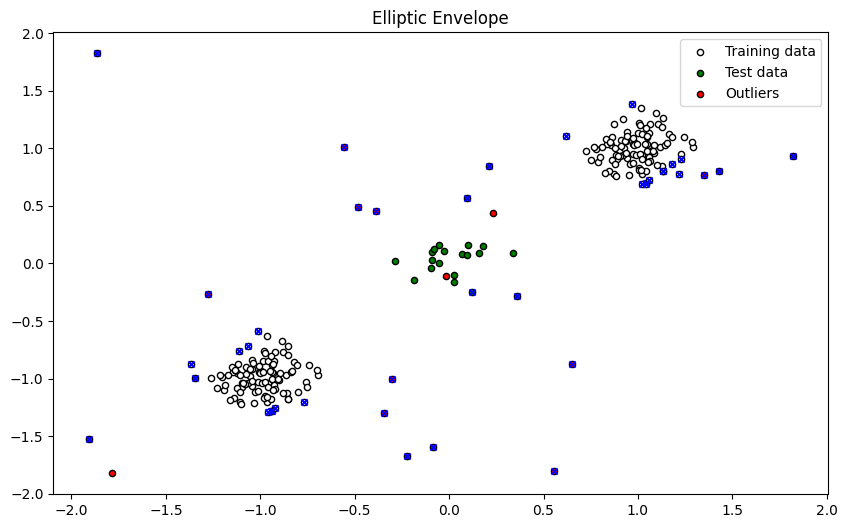

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler

# Generating a synthetic dataset
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_test = 0.3 * rng.randn(20, 2)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_outliers = scaler.transform(X_outliers)

# Elliptic Envelope
ell_env = EllipticEnvelope(contamination=0.1)
ell_env.fit(X_train)

# Predicting anomalies
y_pred_train_ell = ell_env.predict(X_train)
y_pred_test_ell = ell_env.predict(X_test)
y_pred_outliers_ell = ell_env.predict(X_outliers)

# Plotting results
def plot_results(X_train, X_test, X_outliers, y_pred_train, y_pred_test, y_pred_outliers, title):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k', label="Training data")
    plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k', label="Test data")
    plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k', label="Outliers")
    plt.scatter(X_train[y_pred_train == -1][:, 0], X_train[y_pred_train == -1][:, 1], c='blue', s=20, edgecolor='k', marker='x')
    plt.scatter(X_test[y_pred_test == -1][:, 0], X_test[y_pred_test == -1][:, 1], c='blue', s=20, edgecolor='k', marker='x')
    plt.scatter(X_outliers[y_pred_outliers == -1][:, 0], X_outliers[y_pred_outliers == -1][:, 1], c='blue', s=20, edgecolor='k', marker='x')
    plt.legend()
    plt.show()

plot_results(X_train, X_test, X_outliers, y_pred_train_ell, y_pred_test_ell, y_pred_outliers_ell, "Elliptic Envelope")


<div style="border-radius:10px; padding: 15px; font-size:100%; text-align:left">

<h2 align="left"><font color=green>One-Class SVM</font></h2>



This code snippet demonstrates using the One-Class SVM algorithm to detect anomalies in a synthetic dataset. It starts by generating a dataset with training, test, and outlier data. The data is then standardized using StandardScaler to ensure consistent scaling. A One-Class SVM model is trained on the standardized training data and used to predict anomalies in the training, test, and outlier data. The anomalies are labeled as -1, while normal points are labeled as 1. Finally, the results are visualized in a plot where the training data points are shown in white, test data in green, outliers in red, and detected anomalies marked with blue 'x's. This visualization helps to illustrate how well the model identifies anomalies across different datasets.

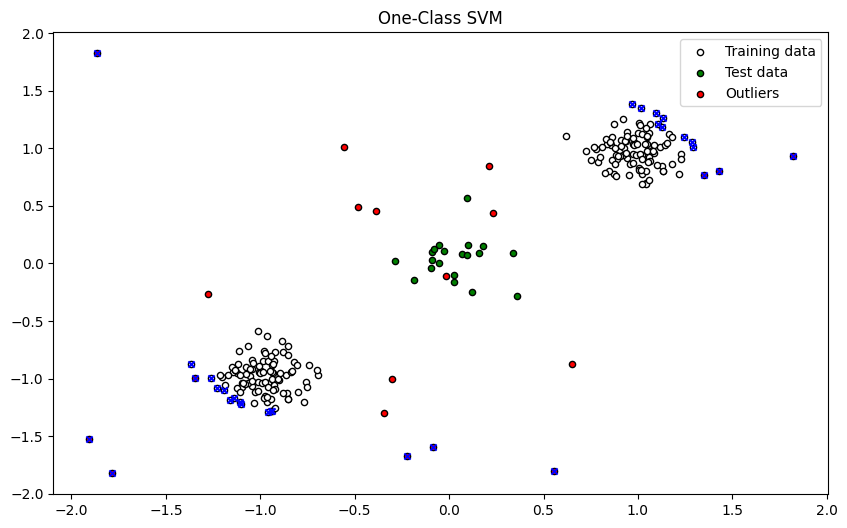

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Generating a synthetic dataset
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_test = 0.3 * rng.randn(20, 2)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_outliers = scaler.transform(X_outliers)

# One-class SVM
one_svm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
one_svm.fit(X_train)

# Predicting anomalies
y_pred_train_svm = one_svm.predict(X_train)
y_pred_test_svm = one_svm.predict(X_test)
y_pred_outliers_svm = one_svm.predict(X_outliers)

# Plotting results
def plot_results(X_train, X_test, X_outliers, y_pred_train, y_pred_test, y_pred_outliers, title):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k', label="Training data")
    plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k', label="Test data")
    plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k', label="Outliers")
    plt.scatter(X_train[y_pred_train == -1][:, 0], X_train[y_pred_train == -1][:, 1], c='blue', s=20, edgecolor='k', marker='x')
    plt.scatter(X_test[y_pred_test == -1][:, 0], X_test[y_pred_test == -1][:, 1], c='blue', s=20, edgecolor='k', marker='x')
    plt.scatter(X_outliers[y_pred_outliers == -1][:, 0], X_outliers[y_pred_outliers == -1][:, 1], c='blue', s=20, edgecolor='k', marker='x')
    plt.legend()
    plt.show()

plot_results(X_train, X_test, X_outliers, y_pred_train_svm, y_pred_test_svm, y_pred_outliers_svm, "One-Class SVM")
